## SEMINARSKA NALOGA

### PRIDOBITEV IN OBLIKOVANJE PODATKOV
 
Stolpci, ki opisujejo naše podatke so naslednji:  
* ZaporednaStevilkaKD,
* MesecStoritve,
* UraStoritve,
* DanVTednu,
* OrganizacijskaEnotaStoritve,
* Povratnik,
* OpisKD,
* PoglavjeKD,
* GospodarskiKriminal,
* OrganiziranKriminal,
* MladoletniskaKriminaliteta,
* Poskus,
* KriminalisticnaOznacba1,
* KriminalisticnaOznacba2,
* KriminalisticnaOznacba3,
* UporabljenoSredstvo1,
* UporabljenoSredstvo2,
* UporabljenoSredstvo3,
* UporabljenoSredstvo4,
* UpravnaEnota,
* OpisKraja,
* LetoZakljucnegaDokumenta,
* VrstaZakDokumenta,
* ZaporednaStevilkaOsebeVKD,
* VrstaOsebe,
* StarostniRazred,
* Spol,
* Drzavljanstvo,
* Poskodba,
* VplivAlkohola,
* VplivMamil,
* OrganiziranaZdruzba,
* Skoda

In [1]:
import pandas as pd
import glob
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

l = glob.glob('data/*.csv')
for i in range(len(l)):
    l[i] = l[i].split('\\')[-1].upper()

# slovar poti do .csv datotek 
csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [2]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

### ANALIZA PODATKOV GLEDE NA ČAS

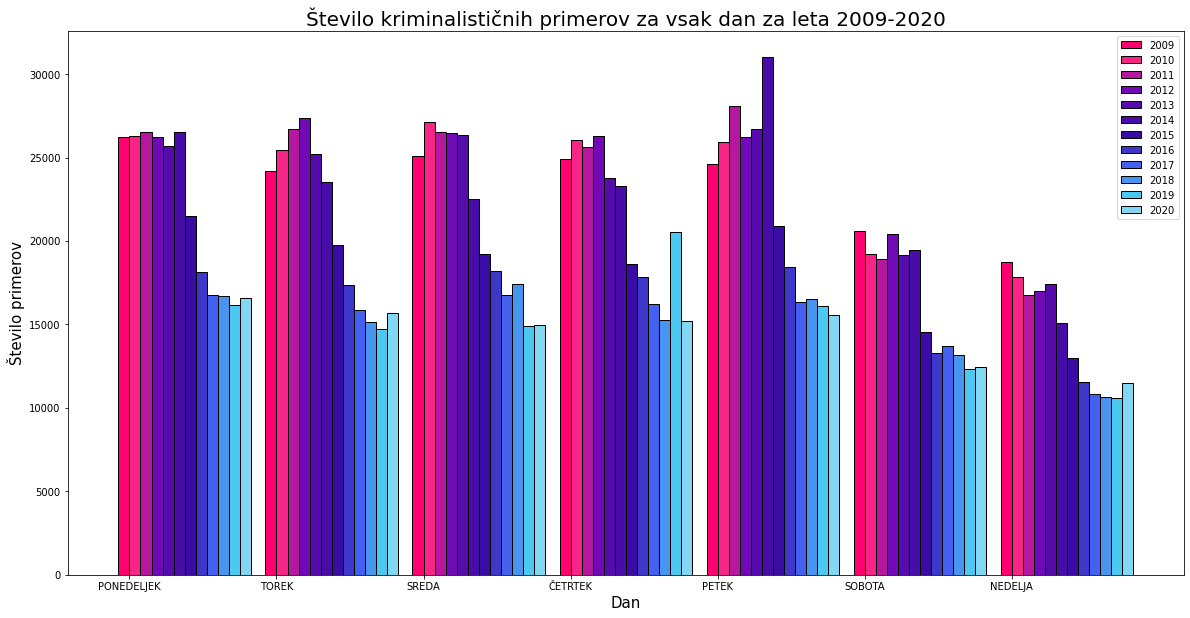

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
def convert_date(s) -> str:
    print(s)
    return s

time_dataframes = {k:v for k,v in dataframes.items()}

y_list = []

for value in time_dataframes.values():
    df1 = copy(value)

    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')

    dnevi = df1['DanVTednu'].value_counts()
    y_list.append([dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA])

width = 0.9/len(y_list)

plt.figure(figsize=(20,10))

colors = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

for i in range(len(y_list)):
    color = colors[i]
    n=len(y_list[i])
    r = np.arange(n)
    plt.bar(r+width*i, y_list[i], color = color,
        width = width, edgecolor = 'black',
        label=str(2009+i))

plt.xticks(r + width/2,['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA'])
plt.title('Število kriminalističnih primerov za vsak dan za leta 2009-2020', fontsize=20)
plt.xlabel('Dan', fontsize=15)
plt.ylabel('Število primerov', fontsize=15)
plt.legend()
plt.show()